# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#esto lo que hace es pasarle nuestras credenciales a la API de Spotify
# y nos permite hacer peticiones a la API de Spotify

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

# 76R7k5vuX8M7vBDv21DPCv TERE
# 5GGJosGMs08YEmKTZJe1fL Suki waterhouse

#obtener las mejores cacniones del artista
results = spotify.artist_top_tracks("5GGJosGMs08YEmKTZJe1fL")

songs = []
for track in results ['tracks']:
    songs.append({"name": track['name'], 
                  "popularity": track['popularity'], 
                  "duration_min": track['duration_ms']/60000})
df = pd.DataFrame(songs)

print(df)


                       name  popularity  duration_min
0              Good Looking          86      3.580000
1                     Moves          71      3.217183
2                    My Fun          67      2.704850
3                   To Love          68      3.947300
4                       OMG          68      2.976150
5              On This Love          55      2.831717
6               Dream Woman          51      4.143350
7            Blackout Drunk          62      2.467017
8                  Supersad          61      2.839717
9  Model, Actress, Whatever          61      3.542167


<function matplotlib.pyplot.show(close=None, block=None)>

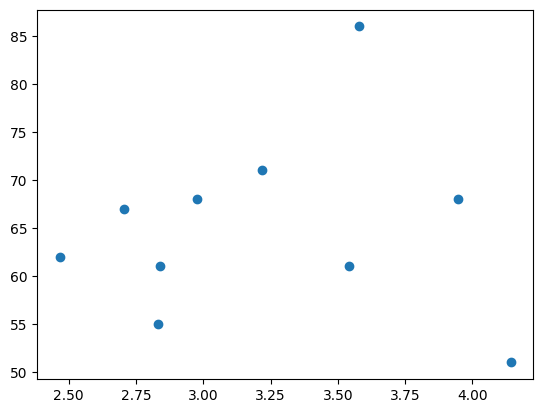

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['duration_min'], df['popularity'])
plt.show

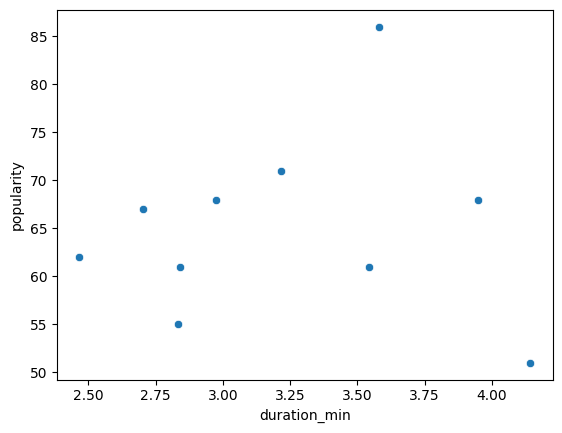

In [3]:
sns.scatterplot(df, x='duration_min', y='popularity')
plt.show()

En los gráficos de dispersión no se observa una tendencia clara: canciones más largas no necesariamente son más populares, y lo mismo ocurre con las más cortas.

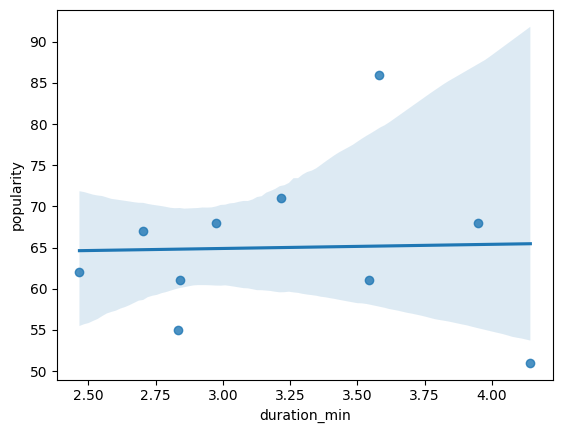

In [ ]:
#Aqui incuimos una linea de regresion para poder observar la tendencia de los datos
import seaborn as sns
sns.regplot(df, x='duration_min', y='popularity')
plt.show()

Podemos concluir que la duracion de las canciones no influye significativamente en su popularidad. Lo cual sugiere que la popularidad esta mas ligada a factores externos que la estrucutra de tiempo de la cancion

PARTE 2 PROPUESTA

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Autenticación
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
artist_name = "Nombre del Artista"
results = sp.search(q='artist:' + artist_name, type='artist')
artist = results['artists']['items']

# Obtener las canciones más populares del artista
results = sp.artist_top_tracks("5GGJosGMs08YEmKTZJe1fL")


In [23]:
# Extraer IDs de las canciones
track_ids = [track["id"] for track in results["tracks"]]

# Obtener características de audio
features = sp.audio_features(track_ids)

# Crear DataFrame con información básica
tracks_data = []
for track in results["tracks"]:
    tracks_data.append({
        "name": track["name"],
        "popularity": track["popularity"],
        "duration_ms": track["duration_ms"],
        "id": track["id"]
    })

df_tracks = pd.DataFrame(tracks_data)

# Combinar con características de audio
df_features = pd.DataFrame(features)
df = pd.merge(df_tracks, df_features, on="5GGJosGMs08YEmKTZJe1fL")

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0j3mqDTK4Z6lvrLzFCUUz6,6TT7B4MigCJCc0tqKYEpZC,3nPifd7hjanGVp02REhtlH,4pteEcX2rHSJXK8XSOtWP8,5vYjTN8d0DZ2SosbKSx5Nj,4HrJu1oEafqA6vLMWDJUQn,6w6MDFLUFroW5fcyypXzfF,0PyN8JswfA5otVomw09V5Q,0vp0qyKGy5FLakkrkdmZSH,4wjE62bHELzlZvE52cxMfL with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0j3mqDTK4Z6lvrLzFCUUz6,6TT7B4MigCJCc0tqKYEpZC,3nPifd7hjanGVp02REhtlH,4pteEcX2rHSJXK8XSOtWP8,5vYjTN8d0DZ2SosbKSx5Nj,4HrJu1oEafqA6vLMWDJUQn,6w6MDFLUFroW5fcyypXzfF,0PyN8JswfA5otVomw09V5Q,0vp0qyKGy5FLakkrkdmZSH,4wjE62bHELzlZvE52cxMfL:
 None, reason: None